In [2]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [3]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt

In [4]:
from neopgfs.environment import Environment
from neopgfs.chemonster import Chemonster

In [20]:
chemonster = Chemonster(k=5, objective="hiv_int")
env = Environment(chemonster)

reactants.shape=(150560,), reactions.shape=(64,)
new reactions.shape=(113,)
113 kNN models created and trained in 2.69 seconds
Loaded 25 QSAR models


In [72]:
rxn_idx = 25
curr_state = ""# necesito un r0
action_R = "" # necesito un r1 noisy

In [96]:
rxn_reactants = chemonster.rel_r0_rxns[:, rxn_idx]
r0_idx = np.random.choice(np.nonzero(rxn_reactants)[0])
r0 = chemonster.get_reactant(r0_idx)
curr_state = Chem.MolToSmiles(r0)
rxn_r1s = chemonster.rel_r1_rxns[:, rxn_idx]
r1_idx = np.random.choice(np.nonzero(rxn_r1s)[0])
r1 = chemonster.get_reactant(r1_idx)
r1_rlv2_noisy = chemonster.vectorize_smiles(Chem.MolToSmiles(r1), "rlv2") + 0.001

In [127]:
np.save("/home/alfredo/work/rl/neopgfs/neopgfs/tests/action_R_test_pipeline.npy", r1_rlv2_noisy)

In [128]:
curr_state

'CCN(CC)C(=O)c1ccc(C=O)cc1'

In [129]:
rxn_idx

25

In [131]:
next_state, reward = chemonster.environment_step_pipeline(curr_state, rxn_idx, r1_rlv2_noisy)

In [132]:
next_state

'CCN(CC)C(=O)c1ccc(-c2nc3c(c4ccccc4-c4ccc(N)cc4-3)-[nH]2)cc1'

In [133]:
reward

5.089601910061103

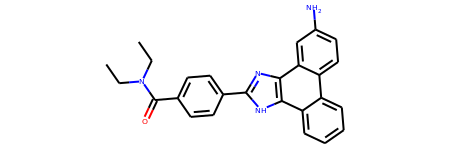

In [121]:
Chem.MolFromSmiles('CCN(CC)C(=O)c1ccc(-c2nc3c(c4ccccc4-c4ccc(N)cc4-3)-[nH]2)cc1')

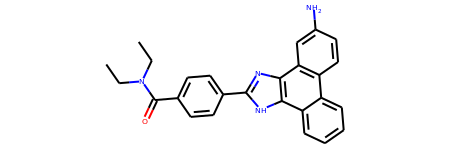

In [122]:
chemonster.get_reaction(rxn_idx).RunReactants([r0, r1])[0][0]

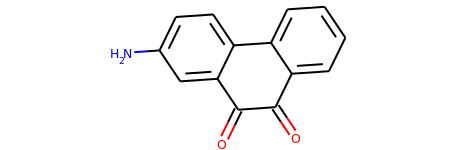

In [123]:
chemonster.get_reactant(r1_idx)

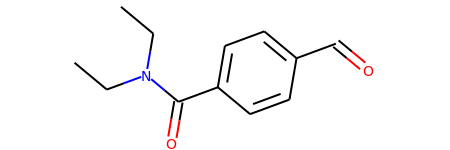

In [124]:
chemonster.get_reactant(r0_idx)

RDKit ERROR: [14:55:50] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4
RDKit ERROR: 
RDKit ERROR: [14:55:50] Explicit valence for atom # 0 N, 4, is greater than permitted


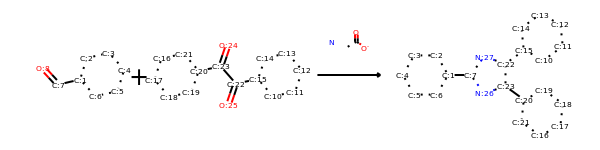

In [126]:
chemonster.get_reaction(rxn_idx)

In [55]:
rxn_idx = 25
reactant_idx = np.random.choice(np.where(chemonster.rel_r1_rxns[:, rxn_idx] > 0)[0])
reactant_rlv2 = chemonster.vectorize_smiles(Chem.MolToSmiles(chemonster.get_reactant(reactant_idx)), 'rlv2') + 0.0001

In [56]:
reactant_idx

45943

In [64]:
np.save("/home/alfredo/work/rl/neopgfs/neopgfs/tests/action_test.npy", reactant_rlv2)

In [63]:
chemonster.get_k_neighbors(reactant_rlv2, rxn_idx)

[45943, 45942, 109993, 110695, 110694]

In [60]:
np.where(chemonster.rel_r1_rxns[:, rxn_idx])[0][[1, 0, 3, 7, 6]]

array([ 45943,  45942, 109993, 110695, 110694])

RDKit ERROR: [13:50:36] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4
RDKit ERROR: 
RDKit ERROR: [13:50:36] Explicit valence for atom # 0 N, 4, is greater than permitted


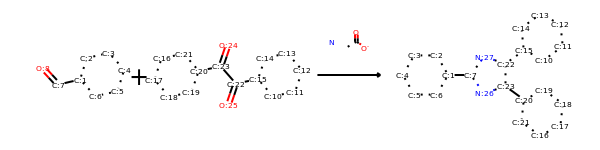

In [36]:
chemonster.get_reaction(25)

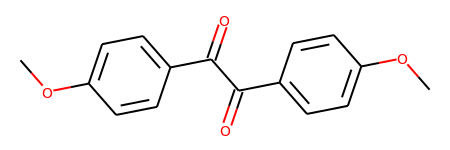

In [37]:
chemonster.get_reactant(reactant_idx)

In [22]:
action = np.load("/home/alfredo/work/rl/neopgfs/neopgfs/tests/action_test.npy")
action

array([[-0.1, -0.6,  1.1, -1. , -0.7, -0.3, -0. ,  2.6,  0.5, -0.3,  0.8,
        -0.1,  0.2, -0.3,  0.2,  0.3,  0.7,  1.8,  1.2,  0.4,  0.6,  2.2,
        -1.1,  1.5,  0.2, -0.7, -0.1,  0.4, -0.1,  2.5, -0.8, -0.5,  0.3,
         0.3, -0.5]])

(array([84.,  4.,  4., 13.,  0.,  2.,  4.,  0.,  0.,  2.]),
 array([    0. ,  5923.1, 11846.2, 17769.3, 23692.4, 29615.5, 35538.6,
        41461.7, 47384.8, 53307.9, 59231. ]),
 <BarContainer object of 10 artists>)

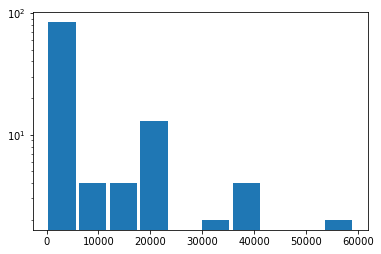

In [10]:
plt.hist(chemonster.rel_r1_rxns.sum(axis=0), rwidth=0.9, log=True)

In [26]:
r0_smiles = "CC#Cc1cccc(B(O)O)c1"
r1_idx = 1747
rxn_idx = 110
exp_result = "C#Cc1cn(-c2cccc(C#CC)c2)cn1"
result = chemonster.reaction_predictor(rxn_idx, r0_smiles, r1_idx)

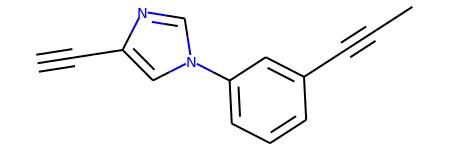

In [46]:
smiles = "C#Cc1cn(-c2cccc(C#CC)c2)cn1"
mol = Chem.MolFromSmiles(smiles)
mol

In [47]:
mol_efcp = np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024))

In [55]:
RLV2_DESCRIPTORS_PATH = "/home/alfredo/work/rl/neopgfs/neopgfs/data/descriptors_rlv2.txt"
QSAR_DESCRIPTORS_PATH = "/home/alfredo/work/rl/neopgfs/neopgfs/data/descriptors_qsar_models.txt"
with open(RLV2_DESCRIPTORS_PATH) as f:
    rlv_desc = [line.strip() for line in f.readlines()]
with open(QSAR_DESCRIPTORS_PATH) as f:
    qsar_desc = [line.strip() for line in f.readlines()]
desc_funcs = dict(Descriptors.descList)
mol_rlv2 = np.array([desc_funcs[desc](mol) for desc in rlv_desc])
mol_qsar = np.array([desc_funcs[desc](mol) for desc in qsar_desc])

In [56]:
outdir = "/home/alfredo/work/rl/neopgfs/neopgfs/tests/test_featurize_smiles.npz"
np.savez(outdir, smiles=np.array([smiles]), rlv2=mol_rlv2, qsar=mol_qsar, efcp=mol_efcp)

In [52]:
chemonster.vectorize_smiles(smiles, 'rlv2')

array([5.27065386e+00, 6.31461824e-01, 6.31461824e-01, 6.54100763e-01,
       2.06248000e+02, 1.37500000e+00, 2.42905296e+00, 1.20212481e+01,
       0.00000000e+00, 1.19868014e+01, 3.10432727e+01, 1.74476813e+01,
       0.00000000e+00, 4.80470114e+01, 0.00000000e+00, 1.81811167e+01,
       0.00000000e+00, 5.69392799e+00, 1.12508378e+01, 0.00000000e+00,
       6.32732007e+00, 7.14285714e-02, 2.22500000e+00, 4.38040404e+00,
       0.00000000e+00, 6.92373720e+00, 0.00000000e+00, 4.19531487e+01,
       1.42715645e+00, 0.00000000e+00, 2.41846529e+01, 3.67896319e+01,
       2.27452815e+01, 6.42334990e+00, 3.36150463e+01])

In [53]:
mol_rlv2

array([ 5.27065386e+00,  6.31461824e-01,  5.27065386e+00,  6.31461824e-01,
        6.54100763e-01,  2.06248000e+02,  1.96168000e+02,  2.06084398e+02,
        7.60000000e+01,  0.00000000e+00,  1.30804242e-01, -3.04944517e-01,
        3.04944517e-01,  1.30804242e-01,  1.37500000e+00,  2.25000000e+00,
        2.93750000e+00,  2.42905296e+00,  6.03396071e+02,  1.13804689e+01,
        8.93587908e+00,  8.93587908e+00,  7.83002980e+00,  4.87052774e+00,
        4.87052774e+00,  3.23584536e+00,  3.23584536e+00,  2.14410942e+00,
        2.14410942e+00,  1.42715645e+00,  1.42715645e+00, -2.45000000e+00,
        1.00809337e+01,  4.38040404e+00,  1.96926923e+00,  9.49504386e+01,
        4.56709965e+00,  1.20212481e+01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.98397852e+00,
        0.00000000e+00,  1.23437842e+01,  1.19868014e+01,  3.10432727e+01,
        1.74476813e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [ ]:
che

In [35]:
res.sum()

36

In [27]:
result

'C#Cc1cn(-c2cccc(C#CC)c2)cn1'

In [28]:
chemonster.scoring_function('C#Cc1cn(-c2cccc(C#CC)c2)cn1')

5.225114984371284

In [29]:
np.save("/home/alfredo/work/rl/neopgfs/neopgfs/tests/action_test.npy", action)

RDKit ERROR: [08:41:23] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 


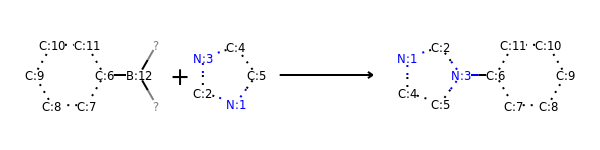

In [11]:
rxn = AllChem.ReactionFromSmarts(chemonster.reactions[110])
rxn

In [34]:
r0 = None
r1 = None
for idx_reactant, smiles_mol in enumerate(chemonster.reactants):
    mol = Chem.MolFromSmiles(smiles_mol)
    if r0 is None and mol.HasSubstructMatch(rxn.GetReactants()[0]):
        r0_idx = idx_reactant
        r0 = mol 
    elif r1 is None and mol.HasSubstructMatch(rxn.GetReactants()[1]):
        r1_idx = idx_reactant
        r1 = mol
    
    if r0 is not None and r1 is not None:
        break

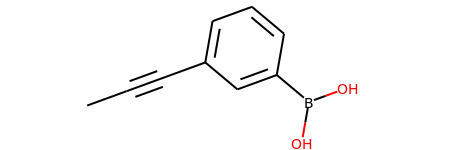

In [35]:
r0

In [36]:
AllChem.MolToSmiles(r0)

'CC#Cc1cccc(B(O)O)c1'

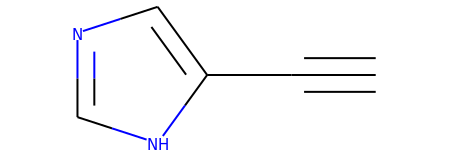

In [37]:
r1

In [38]:
r1_idx

1747

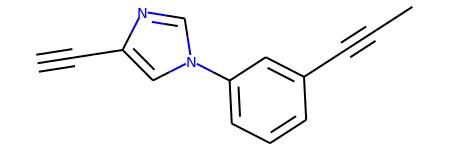

In [40]:
res = chemonster.reaction_predictor(110, Chem.MolToSmiles(r0), r1_idx)
Chem.MolFromSmiles(res)

In [17]:
rel_r0_rxns = np.load('/home/alfredo/work/rl/neopgfs/neopgfs/data/rel_reactant_reactions_r0.npy')
rel_r1_rxns = np.load('/home/alfredo/work/rl/neopgfs/neopgfs/data/rel_reactant_reactions_r1.npy')

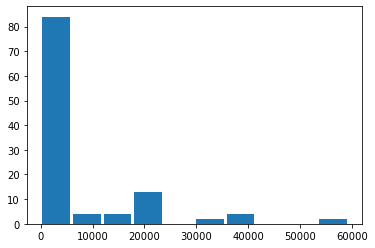

In [18]:
plt.hist(rel_r1_rxns.sum(axis=0), rwidth=0.9);

In [23]:
n_reactions_per_reactant = rel_r1_rxns.sum(axis=1)
np.argwhere(n_reactions_per_reactant==0).shape
# 300 reactants cannot be chosen for any reaction

(302, 1)

In [32]:
np.argmax(rel_r1_rxns.mean(axis=0))

97

In [4]:
Chem.MolFromSmiles(env.reactants[97])

NameError: name 'env' is not defined

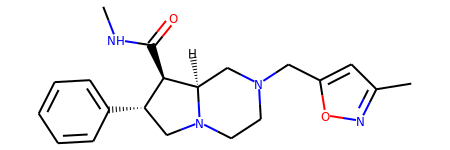

In [12]:
test_molecule = AllChem.MolFromSmiles("CNC(=O)[C@@H]1[C@@H](c2ccccc2)CN2CCN(Cc3cc(C)no3)C[C@H]12")
test_molecule

In [16]:
env.scoring_function("CCOC(=O)c1nc(Nc2ccc(OC)cc2)c2ccccc2n1")

5.234701518308217